# Optimizing Hyperparameters

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
file = '/Users/luciamf/Desktop/Landmarks_generator/Evaluation_carabus.tsv'
eval_df = pd.read_csv(file, sep='\t')
eval_df.head()

,cpu,Fold,Training_size,Testing_size,Tree_depth,cascade_depth,nu,feature_pool_size,num_test_splits,oversampling_amount,landmark_relative_padding_mode,training_time,training_error,testing_error,model_size
0,36,0/4,191,64,6.0,13.0,0.155,400.0,125.0,60.0,1.0,334.404496,0.000873,78.672523,59142.239258
1,36,1/4,191,64,6.0,13.0,0.155,400.0,125.0,60.0,1.0,335.668387,0.001309,92.136374,59142.843750
2,36,2/4,191,64,6.0,13.0,0.155,400.0,125.0,60.0,1.0,334.048773,0.002182,68.789187,59091.894531
3,36,3/4,192,63,6.0,13.0,0.155,400.0,125.0,60.0,1.0,332.547827,0.004774,78.314268,59259.421875
4,36,mean,192,63,6.0,13.0,0.155,400.0,125.0,60.0,1.0,332.547827,0.002284,79.478088,59259.421875


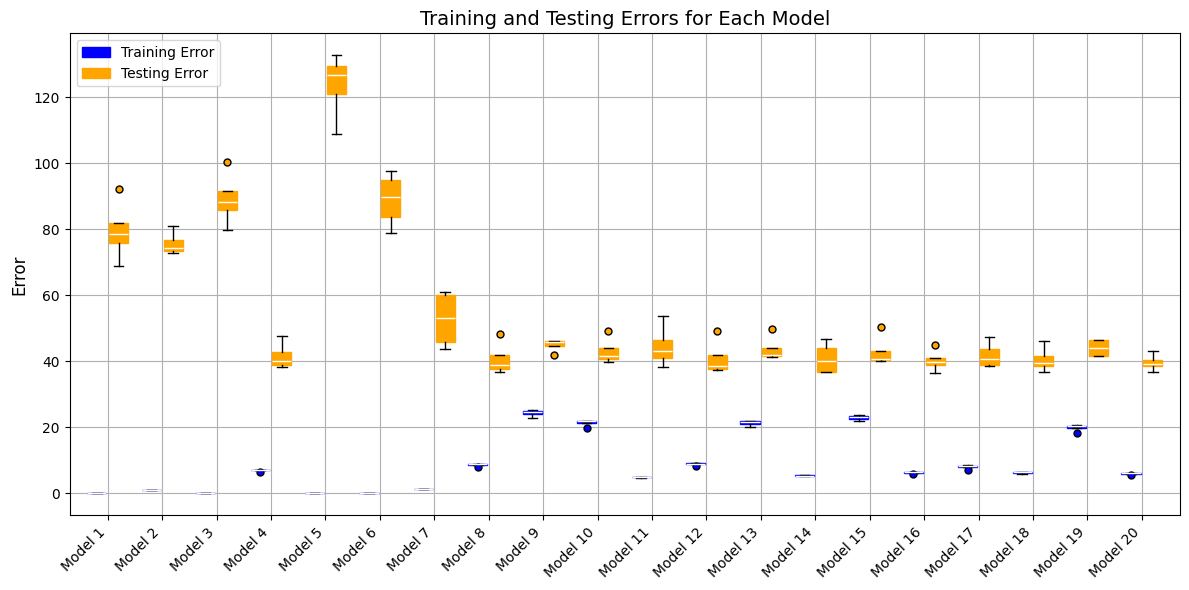

In [ ]:
# Filter out the "mean" rows to focus on individual folds
df_folds = eval_df[eval_df["Fold"] != "mean"]

# Extract unique models (assuming 'cpu' represents models)
models = df_folds["nu"].unique()

# Prepare data for boxplots
training_errors = [df_folds[df_folds["nu"] == model]["training_error"] for i, model in enumerate(models)]
testing_errors = [df_folds[df_folds["nu"] == model]["testing_error"] for i, model in enumerate(models)]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Boxplot positions
positions_train = [i for i in range(len(models))]
positions_test = [i + 0.4 for i in range(len(models))]
width = 0.35

# Training error boxplots
bp_train = ax.boxplot(
    training_errors,
    positions=positions_train,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor="blue", color="blue"),
    medianprops=dict(color="white"),
    flierprops=dict(marker="o", markersize=5, markerfacecolor="blue"),
)

# Testing error boxplots
bp_test = ax.boxplot(
    testing_errors,
    positions=positions_test,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor="orange", color="orange"),
    medianprops=dict(color="white"),
    flierprops=dict(marker="o", markersize=5, markerfacecolor="orange"),
)

# Adjust the x-axis
ax.set_xticks([i + 0.2 for i in range(len(models))])
ax.set_xticklabels([f"Model {i+1}" for i, model in enumerate(models)], rotation=45, ha="right")

# Add labels and legend
ax.set_title("Training and Testing Errors for Each Model", fontsize=14)
ax.set_ylabel("Error", fontsize=12)
ax.legend(
    [bp_train["boxes"][0], bp_test["boxes"][0]],
    ["Training Error", "Testing Error"],
    loc="upper left",
    fontsize=10,
)

# Show the plot
plt.grid() # only horizontal
plt.tight_layout()
plt.show()

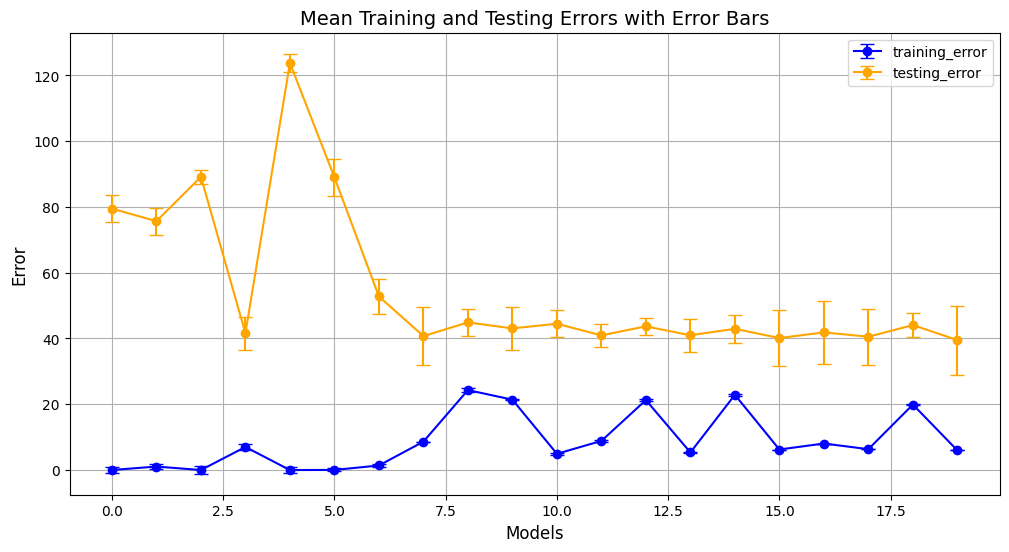

In [36]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the DataFrame to only include "mean" rows
df_mean = eval_df[eval_df["Fold"] == "mean"]

# Calculate standard deviation for error bars (example: based on folds)
df_folds = eval_df[eval_df["Fold"] != "mean"]
std_training_error = df_folds.groupby("nu")["training_error"].std()
std_testing_error = df_folds.groupby("nu")["testing_error"].std()
std_time = df_folds.groupby("nu")["training_time"].std()



# Extract means
mean_training_error = df_mean["training_error"].values
mean_testing_error = df_mean["testing_error"].values
mean_time = df_folds.groupby("nu")["training_time"].mean()

models = range(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Error bars
ax.errorbar(
    models,
    mean_training_error,
    yerr=std_training_error,
    fmt='-o',
    label="training_error",
    color="blue",
    capsize=5,
)

ax.errorbar(
    models,
    mean_testing_error,
    yerr=std_testing_error,
    fmt='-o',
    label="testing_error",
    color="orange",
    capsize=5,
)


# Customize the plot
ax.set_title("Mean Training and Testing Errors with Error Bars", fontsize=14)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Error", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)

plt.show()



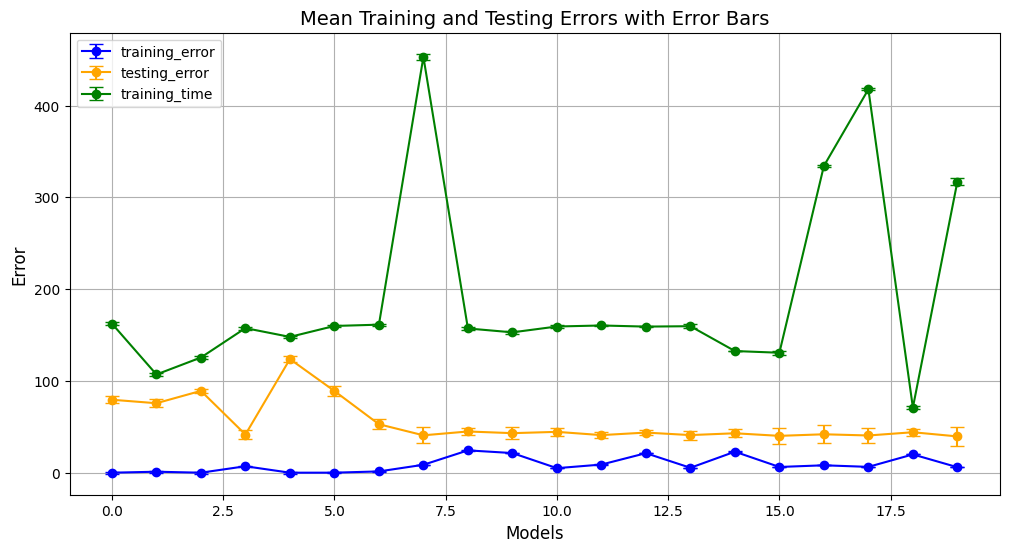

In [66]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the DataFrame to only include "mean" rows
df_mean = eval_df[eval_df["Fold"] == "mean"]

# Calculate standard deviation for error bars (example: based on folds)
df_folds = eval_df[eval_df["Fold"] != "mean"]
std_training_error = df_folds.groupby("nu")["training_error"].std()
std_testing_error = df_folds.groupby("nu")["testing_error"].std()
std_time = df_folds.groupby("nu")["training_time"].std()
std_size = df_folds.groupby("nu")["model_size"].std()



# Extract means
mean_training_error = df_mean["training_error"].values
mean_testing_error = df_mean["testing_error"].values
mean_time = df_folds.groupby("nu")["training_time"].mean()
mean_size = df_folds.groupby("nu")["model_size"].mean()
models = range(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Error bars
ax.errorbar(
    models,
    mean_training_error,
    yerr=std_training_error,
    fmt='-o',
    label="training_error",
    color="blue",
    capsize=5,
)

ax.errorbar(
    models,
    mean_testing_error,
    yerr=std_testing_error,
    fmt='-o',
    label="testing_error",
    color="orange",
    capsize=5,
)
ax.errorbar(
    models,
    mean_time,
    yerr=std_time,
    fmt='-o',
    label="training_time",
    color="green",
    capsize=5,
)

# ax.errorbar(
#     models,
#     mean_size*0.01,
#     # yerr=std_size,
#     fmt='-o',
#     label="model_size",
#     color="pink",
#     capsize=5,
# )

# Customize the plot
ax.set_title("Mean Training and Testing Errors with Error Bars", fontsize=14)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Error", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)

plt.show()



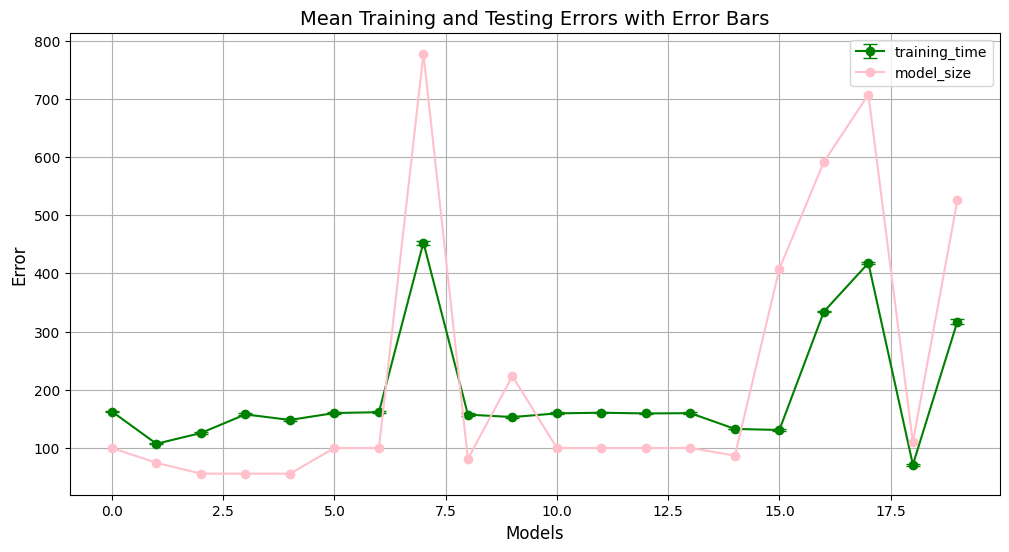

In [67]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter the DataFrame to only include "mean" rows
df_mean = eval_df[eval_df["Fold"] == "mean"]

# Calculate standard deviation for error bars (example: based on folds)
df_folds = eval_df[eval_df["Fold"] != "mean"]
std_training_error = df_folds.groupby("nu")["training_error"].std()
std_testing_error = df_folds.groupby("nu")["testing_error"].std()
std_time = df_folds.groupby("nu")["training_time"].std()
std_size = df_folds.groupby("nu")["model_size"].std()



# Extract means
mean_training_error = df_mean["training_error"].values
mean_testing_error = df_mean["testing_error"].values
mean_time = df_folds.groupby("nu")["training_time"].mean()
mean_size = df_folds.groupby("nu")["model_size"].mean()
models = range(len(models))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))


ax.errorbar(
    models,
    mean_time,
    yerr=std_time,
    fmt='-o',
    label="training_time",
    color="green",
    capsize=5,
)

ax.errorbar(
    models,
    mean_size*0.01,
    # yerr=std_size,
    fmt='-o',
    label="model_size",
    color="pink",
    capsize=5,
)

# Customize the plot
ax.set_title("Mean Training and Testing Errors with Error Bars", fontsize=14)
ax.set_xlabel("Models", fontsize=12)
ax.set_ylabel("Error", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)

plt.show()



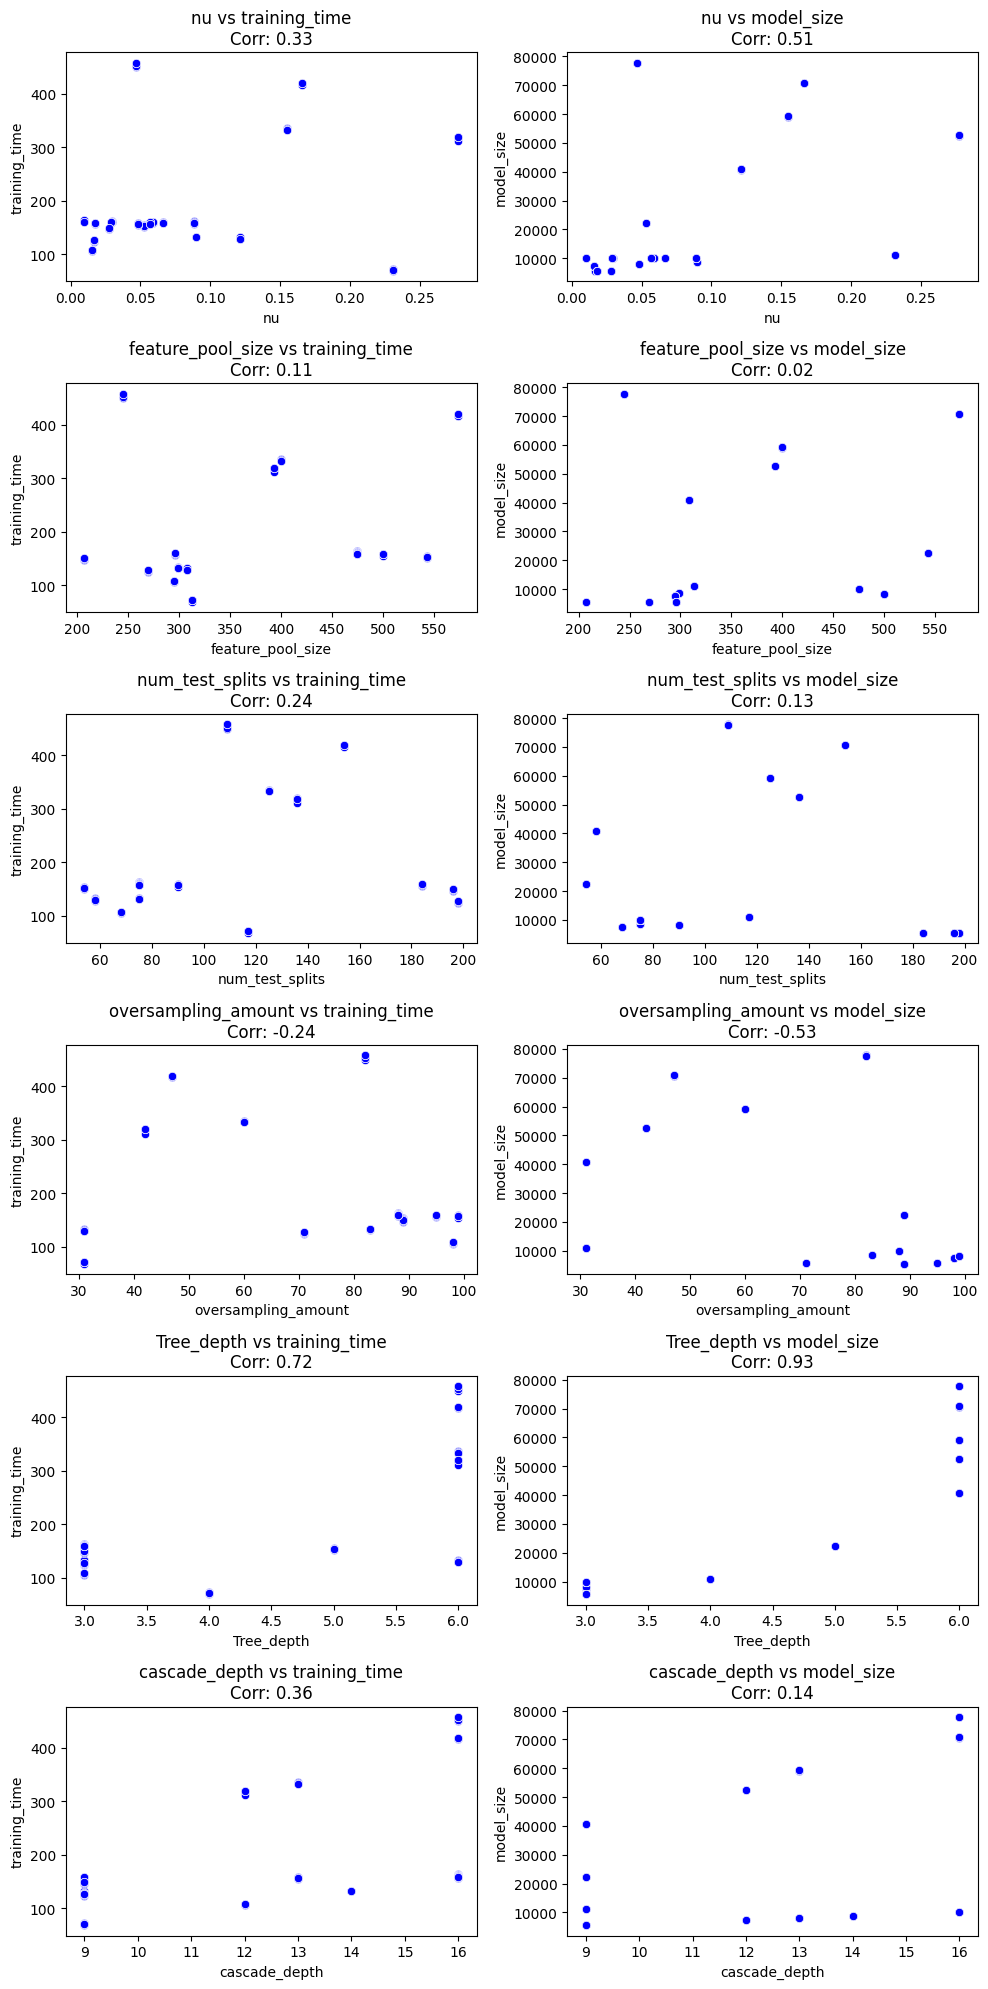

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# List of parameters and target metrics
parameters = ["nu", "feature_pool_size", "num_test_splits", "oversampling_amount", "Tree_depth", "cascade_depth"]
metrics = ["training_time", "model_size"]

# Plotting
fig, axes = plt.subplots(len(parameters), len(metrics), figsize=(10, 20), sharey=False)

for i, param in enumerate(parameters):
    for j, metric in enumerate(metrics):
        sns.scatterplot(
            x=eval_df[param],
            y=eval_df[metric],
            ax=axes[i, j],
            color="blue",
        )
        # Add correlation coefficient (Pearson's r)
        corr = eval_df[[param, metric]].corr().iloc[0, 1]
        axes[i, j].set_title(f"{param} vs {metric}\nCorr: {corr:.2f}")
        axes[i, j].set_xlabel(param)
        axes[i, j].set_ylabel(metric)

plt.tight_layout()
plt.show()


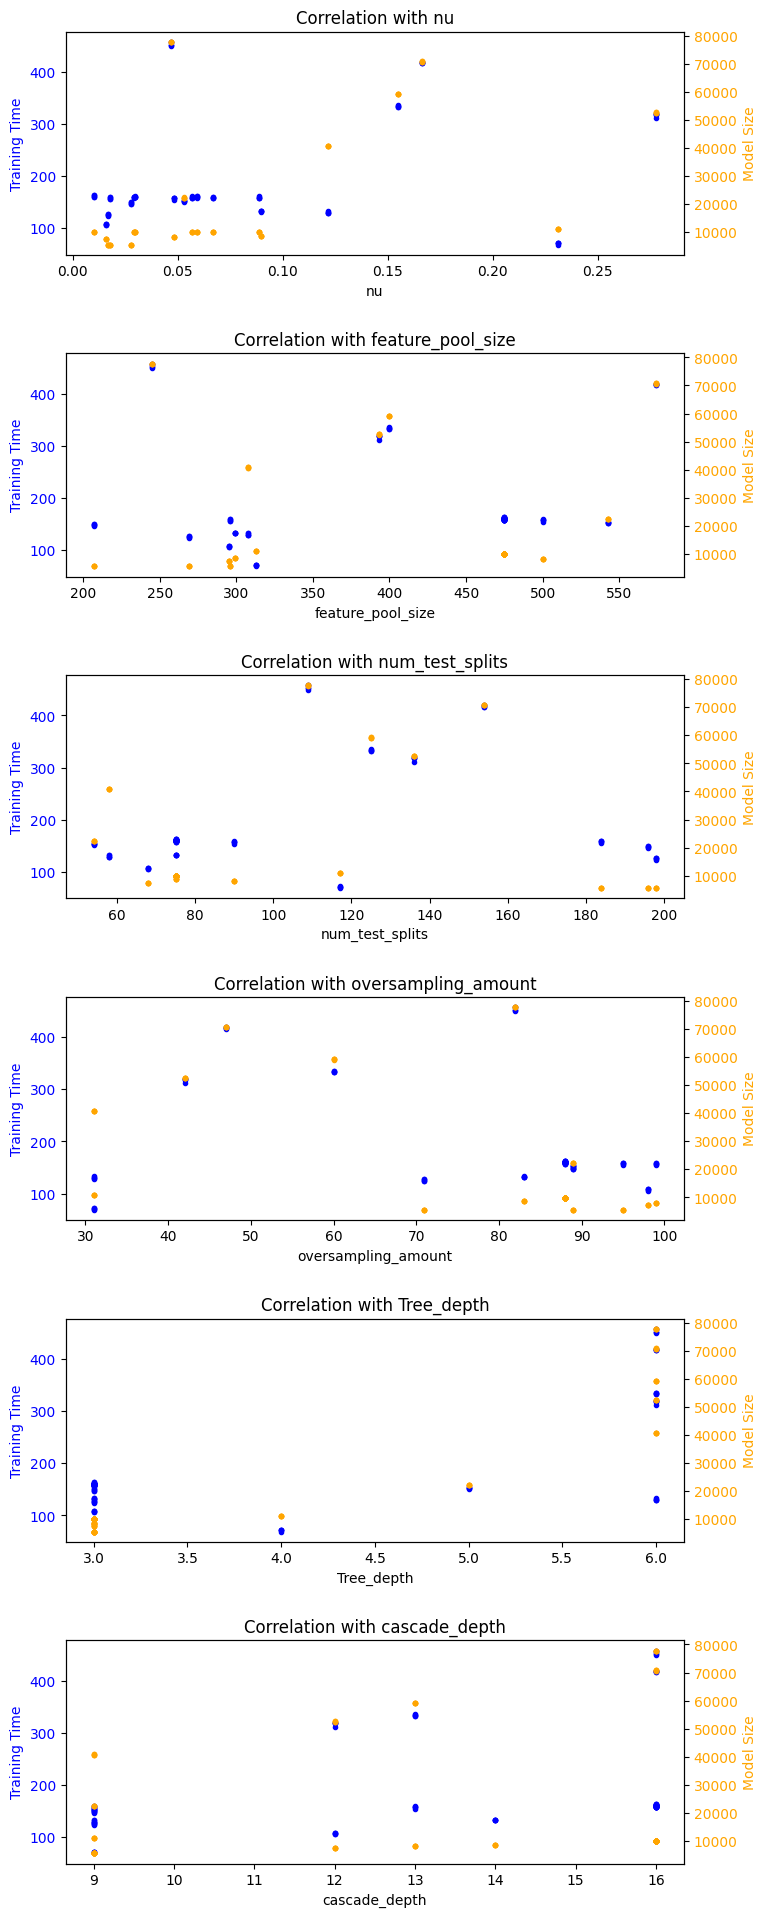

In [75]:
# Create a subplot for each feature
fig, axes = plt.subplots(len(parameters), 1, figsize=(8, 20), sharex=False)
fig.tight_layout(pad=5)

for i, feature in enumerate(parameters):
    ax1 = axes[i]
    
    # Plot training_time with the feature on the left y-axis
    ax1.scatter(eval_df[feature], eval_df["training_time"], color="blue", label="Training Time", marker='.')
    ax1.set_ylabel("Training Time", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_title(f"Correlation with {feature}")
    ax1.set_xlabel(feature)
    
    # Create a secondary y-axis for model_size
    ax2 = ax1.twinx()
    ax2.scatter(eval_df[feature], eval_df["model_size"], color="orange", label="Model Size", marker='.')
    ax2.set_ylabel("Model Size", color="orange")
    ax2.tick_params(axis="y", labelcolor="orange")

# Show the plot
plt.show()

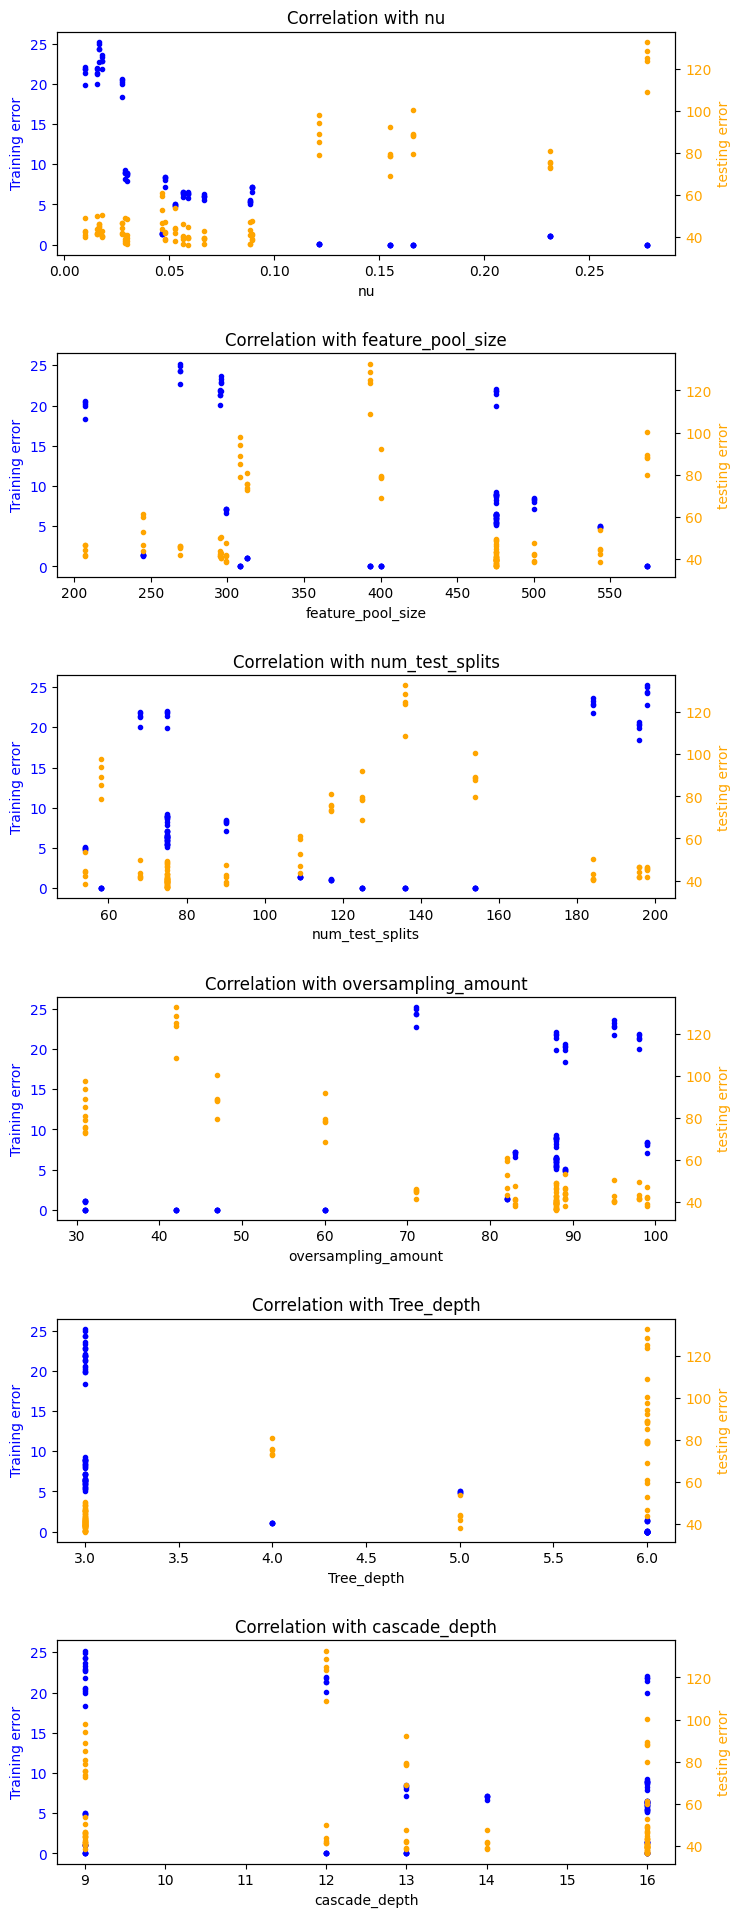

In [77]:
# Create a subplot for each feature
fig, axes = plt.subplots(len(parameters), 1, figsize=(8, 20), sharex=False)
fig.tight_layout(pad=5)

for i, feature in enumerate(parameters):
    ax1 = axes[i]
    
    # Plot training_time with the feature on the left y-axis
    ax1.scatter(eval_df[feature], eval_df["training_error"], color="blue", label="Training error", marker='.')
    ax1.set_ylabel("Training error", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_title(f"Correlation with {feature}")
    ax1.set_xlabel(feature)
    
    # Create a secondary y-axis for model_size
    ax2 = ax1.twinx()
    ax2.scatter(eval_df[feature], eval_df["testing_error"], color="orange", label="testing error", marker='.')
    ax2.set_ylabel("testing error", color="orange")
    ax2.tick_params(axis="y", labelcolor="orange")

# Show the plot
plt.show()

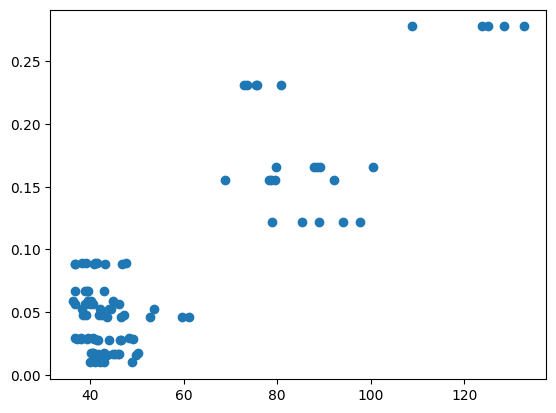

In [41]:
plt.scatter(eval_df['testing_error'].values, eval_df['nu'].values)


In [46]:
count=0
for i in eval_df['testing_error'].values:
    if i > 60:
        count+=1
print(count)

26


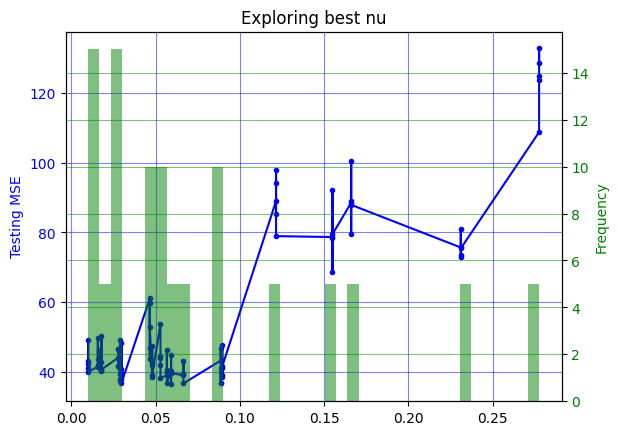

In [50]:
fig, ax1 = plt.subplots()
ax1.plot(df_error['nu'].values, (df_error['testing_error'].values), color='b', marker='.', label='testing_error')
ax1.set_label('Nu')
ax1.set_ylabel('Testing MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, color='b', alpha=0.5)

ax2=ax1.twinx()
ax2.hist(list(eval_df['nu'].values), bins=40, alpha=0.5, color='g')
ax2.set_ylabel('Frequency', color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax2.grid(True, color='g', alpha=0.5)
plt.title("Exploring best nu")
plt.show()